# 训练您的第一个神经网络: 基本分类

本指南训练了一个神经网络模型，来对服装图像进行分类，例如运动鞋和衬衫。

本指南使用`tf.keras`，这是一个用于在TensorFlow中构建和训练模型的高级API。

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os

In [0]:

os.chdir('/content/drive/My Drive/data/')
!mkdir 'fashion-MNIST'

In [0]:
os.chdir('/content/drive/My Drive/data/fashion-MNIST')

In [5]:
!pwd

/content/drive/My Drive/data/fashion-MNIST


## 导入Fashion MNIST数据集
本指南使用Fashion MNIST 数据集，其中包含了10个类别中共70,000张灰度图像。图像包含了低分辨率（28 x 28像素）的单个服装物品，如下所示:


---

![Fashion MNIST数据集](https://tensorflow.org/images/fashion-mnist-sprite.png)

---

本指南使用Fashion MNIST进行多样化，因为它比普通的MNIST更具挑战性。两个数据集都相对较小，用于验证算法是否按预期工作。它们是测试和调试代码的良好起点。

我们将使用60,000张图像来训练网络和10,000张图像来评估网络模型学习图像分类任务的准确程度。您可以直接从TensorFlow使用Fashion MNIST，只需导入并加载数据

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [8]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images,train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


加载数据集并返回四个NumPy数组:

- train_images和train_labels数组是训练集—这是模型用来学习的数据。
- 模型通过测试集进行测试, 即test_images与 test_labels两个数组。

图像是28x28 NumPy数组，像素值介于0到255之间。labels是一个整数数组，数值介于0到9之间。这对应了图像所代表的服装的类别:


每个图像都映射到一个标签。由于类别名称不包含在数据集中,因此把他们存储在这里以便在绘制图像时使用:

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

## 探索数据
让我们在训练模型之前探索数据集的格式。以下显示训练集中有60,000个图像，每个图像表示为28 x 28像素:

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
len(train_labels)

60000

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
len(test_labels)

10000

## 数据预处理
在训练网络之前必须对数据进行预处理。 如果您检查训练集中的第一个图像，您将看到像素值落在0到255的范围内:

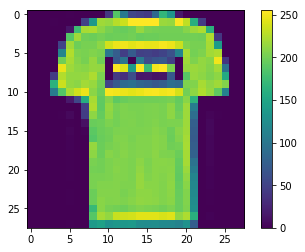

In [16]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

在馈送到神经网络模型之前，我们将这些值缩放到0到1的范围。为此，我们将像素值值除以255。重要的是，对训练集和测试集要以相同的方式进行预处理:

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

显示训练集中的前25个图像，并在每个图像下方显示类名。验证数据格式是否正确，我们是否已准备好构建和训练网络。

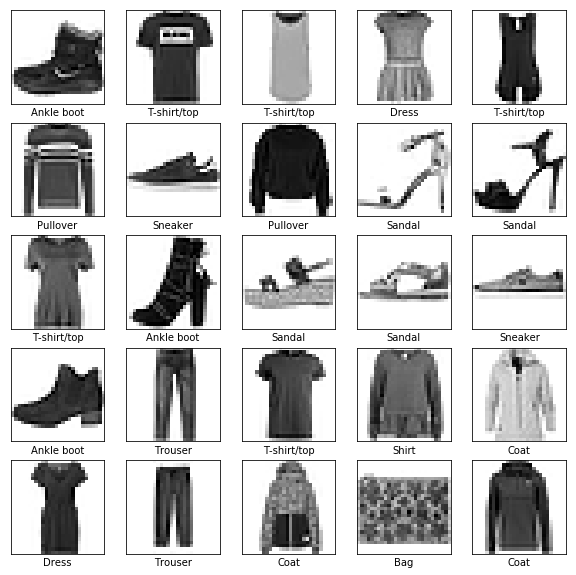

In [18]:
plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  
plt.show()

# 构建模型

构建神经网络需要配置模型的层，然后编译模型。

## 设置网络层
一个神经网络最基本的组成部分便是网络层。网络层从提供给他们的数据中提取表示，并期望这些表示对当前的问题更加有意义

大多数深度学习是由串连在一起的网络层所组成。大多数网络层，例如` tf.keras.layers.Dense `，具有在训练期间学习的参数。

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0820 12:14:07.187140 139677052118912 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


网络中的第一层, `tf.keras.layers.Flatten`, 将图像格式从一个二维数组(包含着28x28个像素)转换成为一个包含着28 * 28 = 784个像素的一维数组。可以将这个网络层视为它将图像中未堆叠的像素排列在一起。这个网络层没有需要学习的参数;它仅仅对数据进行格式化。

在像素被展平之后，网络由一个包含有两个`tf.keras.layers.Dense`网络层的序列组成。他们被称作稠密链接层或全连接层。 第一个Dense网络层包含有128个节点(或被称为神经元)。第二个(也是最后一个)网络层是一个包含10个节点的softmax层—它将返回包含10个概率分数的数组，总和为1。每个节点包含一个分数，表示当前图像属于10个类别之一的概率。

## 编译模型
在模型准备好进行训练之前，它还需要一些配置。这些是在模型的编译(compile)步骤中添加的:

- 损失函数 —这可以衡量模型在培训过程中的准确程度。 我们希望将此函数最小化以"驱使"模型朝正确的方向拟合。
- 优化器 —这就是模型根据它看到的数据及其损失函数进行更新的方式。
- 评价方式 —用于监控训练和测试步骤。以下示例使用准确率(accuracy)，即正确分类的图像的分数。

In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#训练模型
训练神经网络模型需要以下步骤:

1. 将训练数据提供给模型 - 在本案例中，他们是train_images和train_labels数组。

2. 模型学习如何将图像与其标签关联

3. 我们使用模型对测试集进行预测, 在本案例中为test_images数组。我们验证预测结果是否匹配test_labels数组中保存的标签。

通过调用model.fit方法来训练模型 — 模型对训练数据进行"拟合"。

In [21]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4920 - acc: 0.8260
Epoch 2/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3730 - acc: 0.8659
Epoch 3/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3384 - acc: 0.8764
Epoch 4/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3123 - acc: 0.8854
Epoch 5/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2969 - acc: 0.8914


随着模型训练，将显示损失和准确率等指标。该模型在训练数据上达到约0.88(或88％)的准确度。

## 评估准确率

接下来，比较模型在测试数据集上的执行情况:

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.3492 - acc: 0.8755
Test accuracy: 0.8755


事实证明，测试数据集的准确性略低于训练数据集的准确性。训练精度和测试精度之间的差距是过拟合的一个例子。过拟合是指机器学习模型在新数据上的表现比在训练数据上表现更差。

## 进行预测
通过训练模型，我们可以使用它来预测某些图像。

In [0]:
predictions = model.predict(test_images)

在此，模型已经预测了测试集中每个图像的标签。我们来看看第一个预测:

In [24]:
predictions[0]

array([2.3270861e-05, 3.3953402e-08, 2.4655828e-06, 1.2291821e-06,
       7.1349173e-06, 1.8320879e-01, 2.4999608e-04, 1.0864059e-01,
       2.9658878e-04, 7.0756984e-01], dtype=float32)

预测是10个数字的数组。这些描述了模型的"信心"，即图像对应于10种不同服装中的每一种。我们可以看到哪个标签具有最高的置信度值：

In [25]:
np.argmax(predictions[0])

9

因此，模型最有信心的是这个图像是ankle boot，或者 `class_names[9]`。 我们可以检查测试标签，看看这是否正确:

In [26]:
test_labels[0]

9

我们可以用图表来查看全部10个类别

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
    
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                      100 * np.max(predictions_array),
                                      class_names[true_label]),
                                      color=color)
  
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10),predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

让我们看看第0个图像，预测和预测数组。

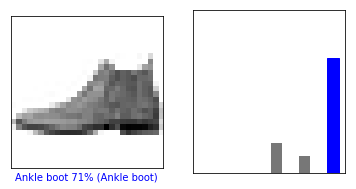

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

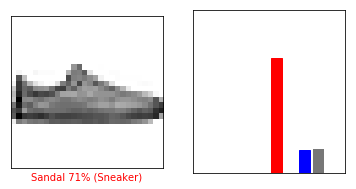

In [29]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

让我们绘制几个图像及其预测结果。正确的预测标签是蓝色的，不正确的预测标签是红色的。该数字给出了预测标签的百分比(满分100)。请注意，即使非常自信，也可能出错。

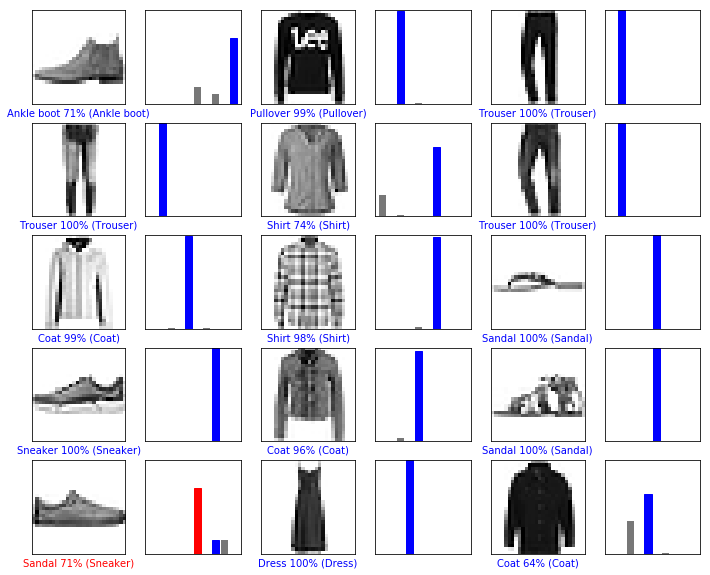

In [30]:
# 绘制前X个测试图像，预测标签和真实标签
# 以蓝色显示正确的预测，红色显示不正确的预测

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2* 2* num_cols, 2* num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2* num_cols, 2*i +1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i + 2)
  plot_value_array(i, predictions, test_labels)
plt.show()

最后，使用训练的模型对单个图像进行预测。

In [31]:
#从测试数据集中获取图像
img = test_images[0]

print(img.shape)

(28, 28)


tf.keras模型经过优化，可以一次性对批量,或者一个集合的数据进行预测。因此，即使我们使用单个图像，我们也需要将其添加到列表中:

In [32]:
#将图像添加到批次中，即使它是唯一的成员
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


现在来预测图像:

In [33]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.3270883e-05 3.3953466e-08 2.4655826e-06 1.2291785e-06 7.1349100e-06
  1.8320885e-01 2.4999582e-04 1.0864063e-01 2.9658873e-04 7.0756978e-01]]


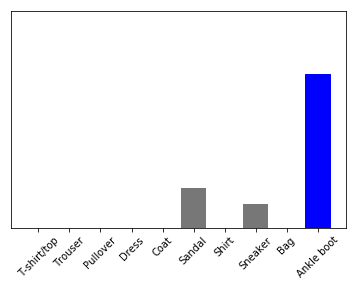

In [34]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10),class_names,rotation=45)
plt.show()

`model.predict`返回一个包含列表的列表，每个图像对应一个列表的数据。获取批次中我们(仅有的)图像的预测:

In [35]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9


而且，和之前一样，模型预测标签为9。